In [1]:
# %load src/plot_settings.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use('ggplot')
%matplotlib inline

twi = '#DCB8E7' #Pale, light grayish mulberry
twi_blu = '#273873' #Dark sapphire blue
twi_pur = '#662D8A' #Moderate purple
twi_pnk = '#ED438D' #Brilliant raspberry


## Loading data

In [2]:
# Read file obtained from my pipeline
usage_df = pd.read_csv('data/usage_timeseries.csv', index_col=1)

# Drop the extra index collumn csv conversion created
usage_df = usage_df.drop(usage_df.columns[0], axis=1)

usage_df.head()

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31
Weapon Name,,,,,,,,,,,,,,,,,,,,,
Splattershot,0.1710,0.1598,0.1548,0.1462,0.0941,0.0940,0.0852,0.0887,0.0858,0.0793,...,0.0652,0.0652,0.0563,0.0535,0.0461,0.0429,0.0444,0.0422,0.0372,0.0355
Range Blaster,0.0683,0.0639,0.0617,0.0634,0.0577,0.0541,0.0396,0.0324,0.0298,0.0238,...,0.0203,0.0232,0.0208,0.0198,0.0151,0.0183,0.0155,0.0167,0.0133,0.0130
Splat Roller,0.0671,0.0693,0.0755,0.0712,0.0742,0.0759,0.0766,0.0802,0.0827,0.0801,...,0.0613,0.0656,0.0650,0.0644,0.0593,0.0467,0.0499,0.0506,0.0464,0.0481
N-ZAP '85,0.0615,0.0665,0.0714,0.0693,0.0776,0.1217,0.1369,0.1290,0.1301,0.1416,...,0.0738,0.0713,0.0785,0.0771,0.0635,0.0596,0.0642,0.0653,0.0663,0.0619
Splat Brella,0.0494,0.0583,0.0591,0.0615,0.0570,0.0529,0.0312,0.0220,0.0199,0.0178,...,0.0207,0.0128,0.0123,0.0122,0.0136,0.0116,0.0102,0.0100,0.0127,0.0119


## Spaghetti plot visualization

In [3]:
def spaghetti(df, name='Spaghetti Plot'):
    # Transpose for plotting
    df = df.transpose()
    
    # Make new collumn to plot x
    df['x'] = np.arange(1, df.shape[0]+1)

    # multiple line plot
    fig, ax = plt.subplots(1, figsize=(16, 8))
    num=0
    for column in df.drop('x', axis=1):
        num+=1
        ax.plot(df['x'], df[column], marker='', linewidth=2, alpha=0.9, label=column)

    # Add legend
    ax.legend(loc=2, ncol=2)

    # Add titles
    plt.title(name, loc='center', fontsize=30, fontweight=0)
    plt.xlabel("Time", fontsize=20)
    plt.ylabel("Usage", fontsize=20);

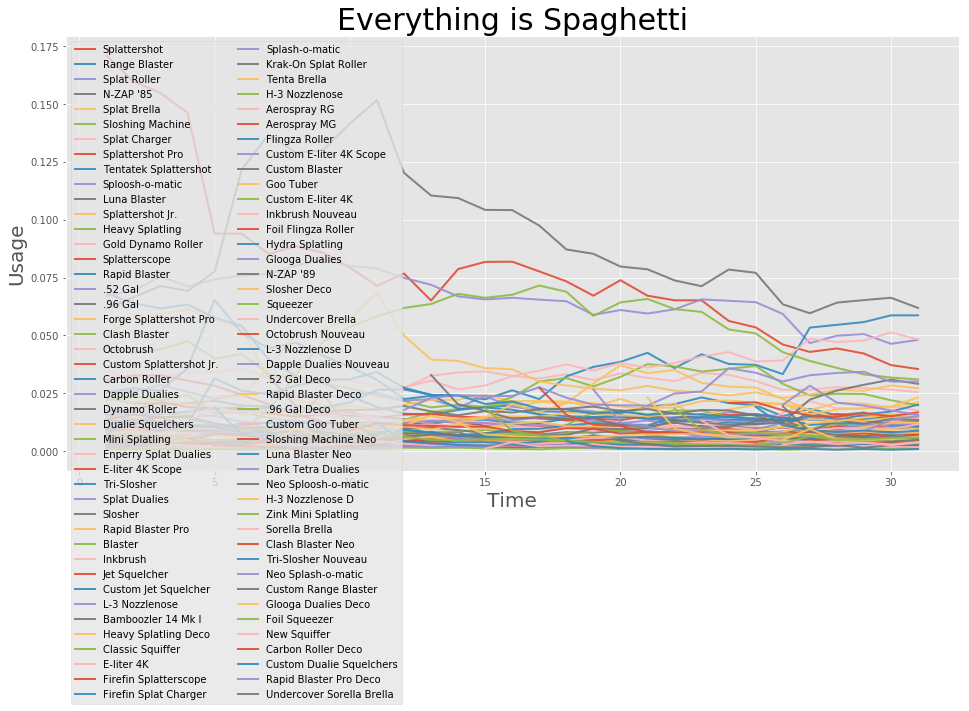

In [4]:
spaghetti(usage_df, 'Everything is Spaghetti')

This plot is next to useless, time to look at the most used weapons

## A better spaghetti

In [5]:
# Top 10 in final week
final = usage_df.sort_values(by=['Week 31'], ascending=False).head(10)
final.head()

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31
Weapon Name,,,,,,,,,,,,,,,,,,,,,
N-ZAP '85,0.0615,0.0665,0.0714,0.0693,0.0776,0.1217,0.1369,0.1290,0.1301,0.1416,...,0.0738,0.0713,0.0785,0.0771,0.0635,0.0596,0.0642,0.0653,0.0663,0.0619
Tentatek Splattershot,0.0254,0.0272,0.0261,0.0359,0.0654,0.0510,0.0445,0.0469,0.0413,0.0364,...,0.0359,0.0419,0.0377,0.0373,0.0333,0.0534,0.0546,0.0558,0.0587,0.0587
Enperry Splat Dualies,0.0104,0.0104,0.0087,0.0134,0.0198,0.0154,0.0180,0.0180,0.0153,0.0140,...,0.0381,0.0409,0.0428,0.0388,0.0392,0.0486,0.0472,0.0478,0.0513,0.0483
Splat Roller,0.0671,0.0693,0.0755,0.0712,0.0742,0.0759,0.0766,0.0802,0.0827,0.0801,...,0.0613,0.0656,0.0650,0.0644,0.0593,0.0467,0.0499,0.0506,0.0464,0.0481
Splattershot,0.1710,0.1598,0.1548,0.1462,0.0941,0.0940,0.0852,0.0887,0.0858,0.0793,...,0.0652,0.0652,0.0563,0.0535,0.0461,0.0429,0.0444,0.0422,0.0372,0.0355


In [6]:
# Top 10 in overall usage
tdf = usage_df.transpose()
overall = tdf.reindex(tdf.mean().sort_values(ascending=False).index, axis=1).transpose().head(10)
overall.head()

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31
Weapon Name,,,,,,,,,,,,,,,,,,,,,
N-ZAP '85,0.0615,0.0665,0.0714,0.0693,0.0776,0.1217,0.1369,0.1290,0.1301,0.1416,...,0.0738,0.0713,0.0785,0.0771,0.0635,0.0596,0.0642,0.0653,0.0663,0.0619
Splattershot,0.1710,0.1598,0.1548,0.1462,0.0941,0.0940,0.0852,0.0887,0.0858,0.0793,...,0.0652,0.0652,0.0563,0.0535,0.0461,0.0429,0.0444,0.0422,0.0372,0.0355
Splat Roller,0.0671,0.0693,0.0755,0.0712,0.0742,0.0759,0.0766,0.0802,0.0827,0.0801,...,0.0613,0.0656,0.0650,0.0644,0.0593,0.0467,0.0499,0.0506,0.0464,0.0481
Blaster,0.0077,0.0068,0.0064,0.0071,0.0075,0.0092,0.0178,0.0330,0.0472,0.0537,...,0.0614,0.0602,0.0526,0.0509,0.0428,0.0390,0.0360,0.0332,0.0318,0.0310
Tentatek Splattershot,0.0254,0.0272,0.0261,0.0359,0.0654,0.0510,0.0445,0.0469,0.0413,0.0364,...,0.0359,0.0419,0.0377,0.0373,0.0333,0.0534,0.0546,0.0558,0.0587,0.0587


In [7]:
# Top 10 in peak usage
tdf = usage_df.transpose()
peak = tdf.reindex(tdf.max().sort_values(ascending=False).index, axis=1).transpose().head(10)
peak.head()

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31
Weapon Name,,,,,,,,,,,,,,,,,,,,,
Splattershot,0.1710,0.1598,0.1548,0.1462,0.0941,0.0940,0.0852,0.0887,0.0858,0.0793,...,0.0652,0.0652,0.0563,0.0535,0.0461,0.0429,0.0444,0.0422,0.0372,0.0355
N-ZAP '85,0.0615,0.0665,0.0714,0.0693,0.0776,0.1217,0.1369,0.1290,0.1301,0.1416,...,0.0738,0.0713,0.0785,0.0771,0.0635,0.0596,0.0642,0.0653,0.0663,0.0619
Splat Roller,0.0671,0.0693,0.0755,0.0712,0.0742,0.0759,0.0766,0.0802,0.0827,0.0801,...,0.0613,0.0656,0.0650,0.0644,0.0593,0.0467,0.0499,0.0506,0.0464,0.0481
Blaster,0.0077,0.0068,0.0064,0.0071,0.0075,0.0092,0.0178,0.0330,0.0472,0.0537,...,0.0614,0.0602,0.0526,0.0509,0.0428,0.0390,0.0360,0.0332,0.0318,0.0310
Forge Splattershot Pro,0.0150,0.0144,0.0143,0.0161,0.0235,0.0236,0.0361,0.0503,0.0525,0.0570,...,0.0261,0.0254,0.0241,0.0254,0.0230,0.0245,0.0265,0.0261,0.0284,0.0272


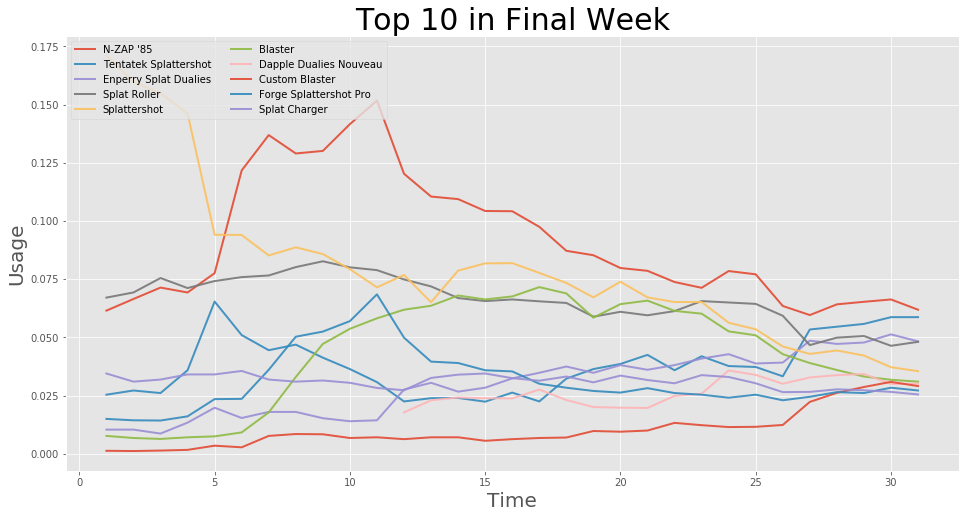

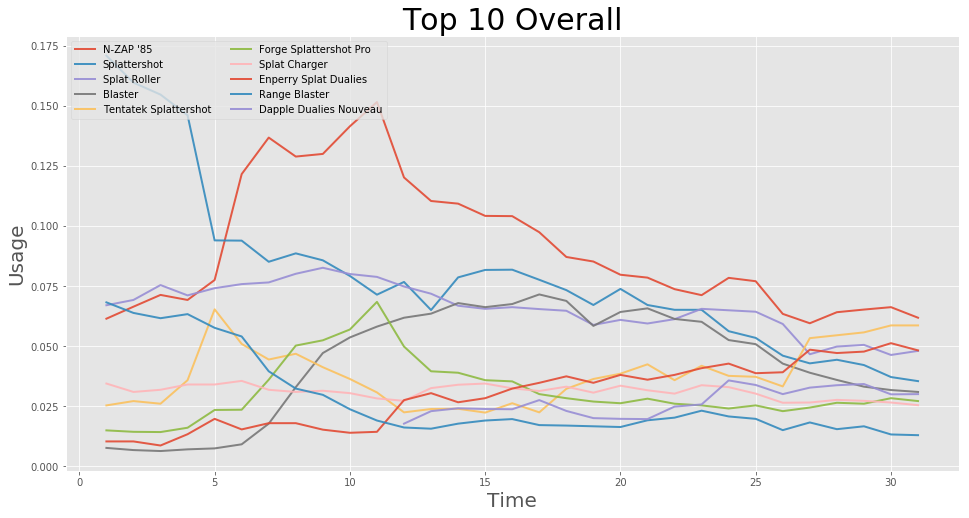

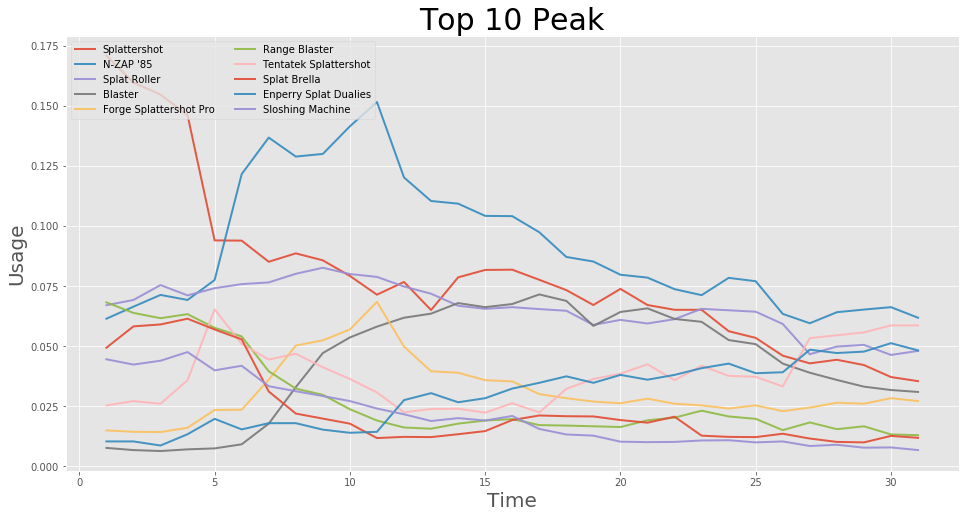

In [8]:
# Plot them all! There's definitely a more elegant way to do this but my function is rudimentary and this works
spaghetti(final, 'Top 10 in Final Week')
spaghetti(overall, 'Top 10 Overall')
spaghetti(peak, 'Top 10 Peak')

## Further investigation

There were a few weapons that showed up in all 3, meaning they were some of the most popular at a given time, had high usage throughout, retained their popularity until the end.

In [12]:
# Find the weapons present in all 3 previous plots

top = []
for element in usage_df.index:
    if element in final.index and element in overall.index and element in peak.index:
        top.append(element)
top

['Splattershot',
 'Splat Roller',
 "N-ZAP '85",
 'Tentatek Splattershot',
 'Forge Splattershot Pro',
 'Enperry Splat Dualies',
 'Blaster']

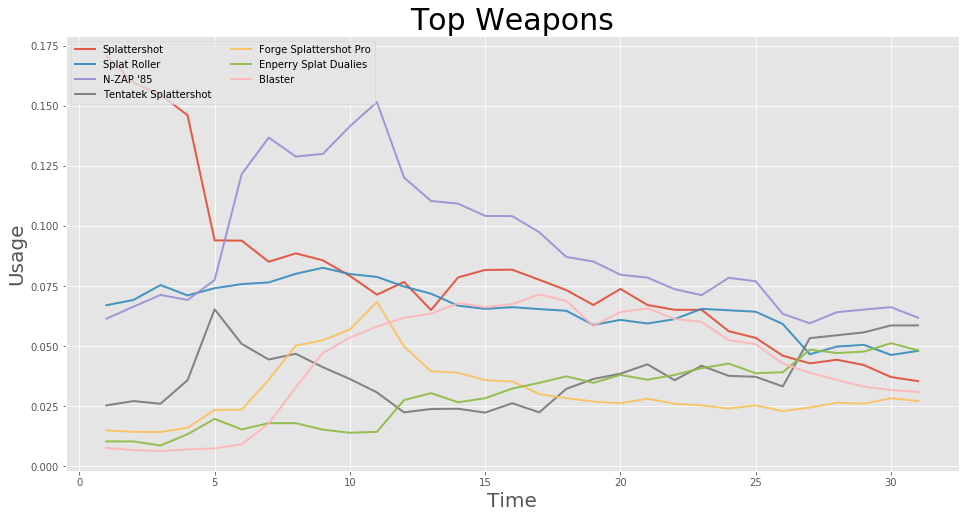

In [16]:
spaghetti(usage_df.loc[top,:], 'Top Weapons')